In [116]:
import cv2, numpy as np
import time
import matplotlib.pylab as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()
    else :
        plt.imshow(image,cmap="gray")
        plt.show()

# Tesseract - OCR 문자 인식
* Tesseract 설치 후 pip install pytesseract

In [ ]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

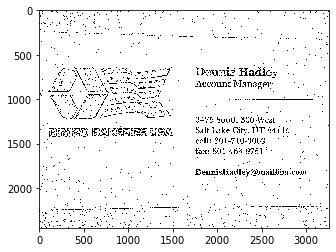

True

In [11]:
image = cv2.imread('../img/ocrtest.jpg', 0)
#img_blur = cv2.GaussianBlur(image, (3,3), 0)

binary = cv2.adaptiveThreshold(image, 255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY, 21,5)

imshow("", binary)
cv2.imwrite("out.png", binary)

In [12]:
str = pytesseract.image_to_string('ocr.png')
print(str)

BR cereals eae ae, D ore tet oa :
eA aly ai artes eet : as . : . /
Nee We Al ant Che te LS that ec en cy van a Mee en z wo , : . a .
oe CRA tal te ene tem inte a VE Fu care ES Se na terete eRe! wk seats :
~ Vreeerete ee

 

 

 

 

Dennis Hadley

- Account Manager —

 

 

8475 South 300 West
~ Salt Lake City, UT 841 15

cell: 801-710- 3069
fax: 801. -463- 9751

a caucacouaeccs :


In [8]:
#원본 이미지로 한다면
str = pytesseract.image_to_string('out.png')
print(str)

AX
ws=

Dennis Hadley
Account Manager

 

3475 South 300 West
Salt Lake City, UT 84115
cell: 801-710-3069

fax: 801-463-9751

DennisHadley@mailbbu.com


영수증에 OCR 적용

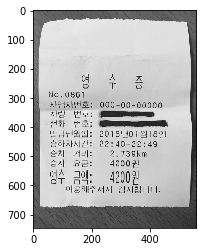

영,
10.0861

91 사업지번호; ,
녀 차랑 번

전화 번호: |
발급년월일: 2018년01월18일
슴하자시간: 22:40~22:49
승차 거리:   2..73910
승차 요금:  4200원

영수 금액: .4200원

이용해주셔서 감사합니다.


In [24]:
image = cv2.imread('../img/mart5.jpg', 0)
#img_blur = cv2.GaussianBlur(image, (3,3), 0)

binary = cv2.adaptiveThreshold(image, 255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY, 21,5)
imshow("",image)
cv2.imwrite("out.png", binary)

str = pytesseract.image_to_string('out.png', lang='kor')  #언어 지정
print(str)

* 신용카드 이미지 OCR 적용

etree nore nan]

Ne)

\ W341 6834 SL%8 410

oS
te MSA


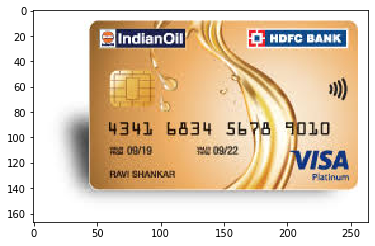

In [19]:
imgsrc = '../img/creditcard05.jpg'
str = pytesseract.image_to_string(imgsrc)
img = cv2.imread(imgsrc)
imshow("",img)
print(str)

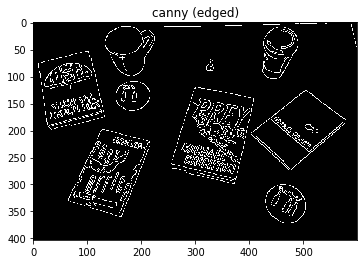

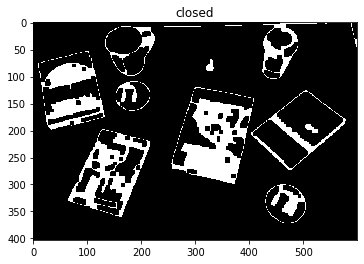

I found 4 books in that image


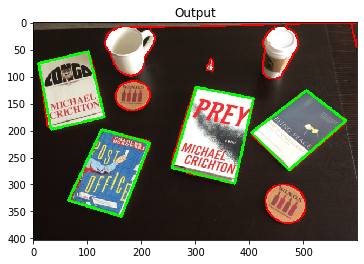

In [35]:
image = cv2.imread("../img/book.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(gray, 10, 250)
imshow("canny (edged)", edged)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
imshow("closed", closed)
cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

cv2.drawContours(image, cnts, -1, (0,0,255), 2)
cv2.imwrite("out.png", image)

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1
print("I found {0} books in that image".format(total))

imshow("Output", image)

* 바둑돌

### HoughCircles
* 영상에서 원을 찾아주는 전용 함수. 원 후보를 scanning
* gradient : 엣지인지 아닌지 판단
* 세번째 parameter : 역수분의 1로 사이즈 바뀜. resolution
* 네번째 : 검출된 원 간의 minimum distance  ~ domain따라 설정값 바꿔줘야

#### 바둑돌 예제

[[[295.5 257.5  28.4]
  [359.5 338.5  28.6]
  [301.5 138.5  27.9]
  [356.5 272.5  29.1]
  [239.5 273.5  28.6]
  [176.5 262.5  28.1]
  [256.5 329.5  29.4]
  [176.5 132.5  28. ]
  [426.5 272.5  28.5]
  [240.5 136.5  28.8]
  [308.5  77.5  27.5]
  [263.5 387.5  29.2]
  [241.5 199.5  28. ]
  [179.5 203.5  28. ]
  [ 83.5 132.5  27.2]
  [324.5 382.5  29.4]
  [367.5 148.5  28.4]
  [249.5  69.5  29.1]]]


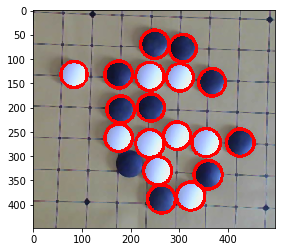

In [43]:
# 원이 잘 찾아졌는지 확인하기
img = cv2.imread('../img/stone.png')

img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=100, param2=30, minRadius=10, maxRadius=50)
print(circles)
circles = np.uint16(np.around(circles))




font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    cv2.circle(img, (x, y),r, (0, 0, 255), 5)

imshow("", img)

[[[275.5 255.5  32.3]
  [162.5 274.5  29.2]
  [231.5 324.5  31.9]
  [313.5 156.5  31.9]
  [191.5 169.5  27.5]]]


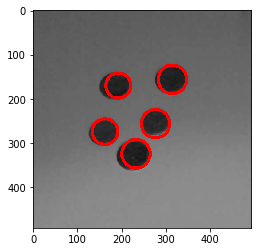

In [45]:
# 코인
img = cv2.imread('../img/coin.png')

img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=100, param2=30, minRadius=10, maxRadius=50)
print(circles)
circles = np.uint16(np.around(circles))




font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    cv2.circle(img, (x, y),r, (0, 0, 255), 5)

imshow("", img)

[[[ 47.5 276.5  23.9]
  [ 63.5  37.5  23.9]
  [ 47.5  97.5  24. ]
  [216.5 105.5  23.9]
  [176.5  84.5  23.8]
  [161.5 137.5  24.5]
  [ 27.5 192.5  23.8]
  [ 22.5 137.5  23.8]
  [204.5 155.5  23.5]
  [177.5 289.5  24.3]
  [134.5  52.5  23.2]
  [196.5 201.5  24.3]
  [173.5 242.5  24.6]
  [ 94.5 198.5  24. ]
  [131.5 288.5  23.2]
  [151.5 191.5  23.5]
  [ 63.5 163.5  24. ]]]


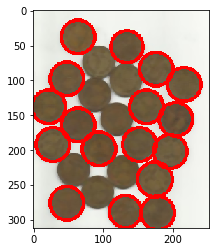

In [48]:
# 코인- morphology 연산하면 나아질 것임
img = cv2.imread('../img/water_coins.jpg')

img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=100, param2=30, minRadius=10, maxRadius=50)
print(circles)
circles = np.uint16(np.around(circles))




font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    cv2.circle(img, (x, y),r, (0, 0, 255), 3)

imshow("", img)

[[[295.5 257.5  28.4]
  [359.5 338.5  28.6]
  [301.5 138.5  27.9]
  [356.5 272.5  29.1]
  [239.5 273.5  28.6]
  [176.5 262.5  28.1]
  [256.5 329.5  29.4]
  [176.5 132.5  28. ]
  [426.5 272.5  28.5]
  [240.5 136.5  28.8]
  [308.5  77.5  27.5]
  [263.5 387.5  29.2]
  [241.5 199.5  28. ]
  [179.5 203.5  28. ]
  [ 83.5 132.5  27.2]
  [324.5 382.5  29.4]
  [367.5 148.5  28.4]
  [249.5  69.5  29.1]]]


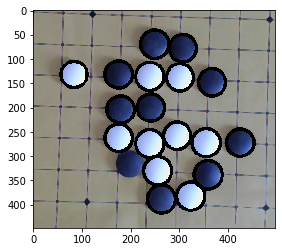

In [51]:
# 원의 색 인식하기-실패
img = cv2.imread('../img/stone.png')

img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=100, param2=30, minRadius=10, maxRadius=50)
print(circles)
circles = np.uint16(np.around(circles))


#lower_range = np.array([140,140,140])
#upper_range = np.array([255,255,255])
detection_white = cv2.inRange(circles, np.array([140,140,140]), np.array([255,255,255]) )
detection_black = cv2.inRange(circles, np.array([0, 0, 0]), np.array([140,140,140]) )

font = cv2.FONT_HERSHEY_SIMPLEX

cv2.circle(img, (x, y),r, (255, 255, 255), 5)
cv2.circle(img, (x, y),r, (255, 255, 255), 5)

'''
for i in circles[0, :]:
    x, y, r = i
    if r in detection :
        cv2.circle(img, (x, y),r, (255, 255, 255), 5)
    else :
        cv2.circle(img, (x, y),r, (0, 0, 0), 5)
''' 
    

imshow("", img)

[[[296 258  28]
  [360 338  29]
  [302 138  28]
  [356 272  29]
  [240 274  29]
  [176 262  28]
  [256 330  29]
  [176 132  28]
  [426 272  28]
  [240 136  29]
  [308  78  28]
  [264 388  29]
  [242 200  28]
  [180 204  28]
  [ 84 132  27]
  [324 382  29]
  [368 148  28]
  [250  70  29]]]
[(255, 3119), (0, 17)]
[(0, 2464), (255, 900)]
[(255, 3113), (0, 23)]
[(255, 3358), (0, 6)]
[(255, 3138), (0, 226)]
[(255, 2945), (0, 191)]
[(255, 3140), (0, 224)]
[(0, 2646), (255, 490)]
[(0, 2393), (255, 743)]
[(255, 3234), (0, 130)]
[(0, 2621), (255, 515)]
[(0, 2726), (255, 638)]
[(0, 2606), (255, 530)]
[(0, 2697), (255, 439)]
[(255, 2859), (0, 57)]
[(255, 3159), (0, 205)]
[(0, 2447), (255, 689)]
[(0, 2717), (255, 647)]


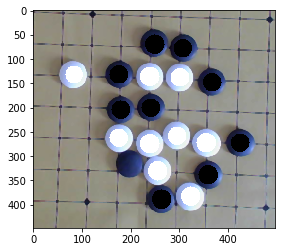

In [54]:
from collections import Counter

def detect_weiqi(img):  
    txt = 'black'
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    c = Counter(list(threshold.flatten()))
    print(c.most_common())
    if c.most_common()[0][0] != 0:
        txt = 'white'
    return txt, threshold


img = cv2.imread('../img/stone.png')

img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨  
#           원일 것 같은 것 가져오기

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=100, param2=30, minRadius=10, maxRadius=50)

circles = np.uint16(np.around(circles))
print(circles)

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    crop_img = img[y - r:y + r, x - r:x + r]    
    txt, threshold = detect_weiqi(crop_img)
    
    if txt == 'black' :  
        cv2.circle(img, (x, y),int(r*0.7), (0, 0, 0), -1)
    else :
        cv2.circle(img, (x, y), int(r*0.7), (255, 255, 255), -1)            


imshow("", img)

In [53]:
# 히스토그램(빈도수) 계산해주는 함수 - Counter
c = Counter([0,0,0,5,2,2,3,4,5,6])
print(c.most_common())

[(0, 3), (5, 2), (2, 2), (3, 1), (4, 1), (6, 1)]


라인 검출도 houghlines 로 가능  
사선 검출할 때 많이 사용

# 행렬 변환 
## Scaling

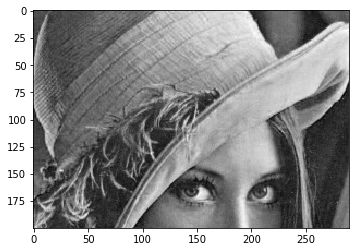

In [70]:
img = cv2.imread('../img/lena.jpg')

img2 = cv2.flip(img, 0)  # 1은 좌우반전, 0은 상하반전  # 얼굴 검출 시 flip되어있으면 못하니까
img3 = cv2.resize(img, (200,200), interpolation=cv2.INTER_CUBIC)


height = img.shape[0]
width = img.shape[1]
wh = 0.5
ww = 0.5
zoom1 = cv2.resize(img, (int(height*wh), int(width*ww)), interpolation=cv2.INTER_CUBIC) #복잡한 표현
res = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC) #일반적인 표현

cropping = img[100:300, 120:410]  #높이, 폭 (행렬로 표기됨) , 3차원. 이미지가 3차원이니까
cropping = img[100:300, 120:410, :]  #명시적으로 쓴 것. 위랑 똑같아
cropping = img[100:300, 120:410, 0]  #b채널만.
cropping = img[100:300, 120:410, 0:2]  #오류나

imshow("", cropping)

## Shift
스케일링처럼 +-10%  하는것처럼  
이동도 +-20pixel 랜덤으로.

[128 138 225]


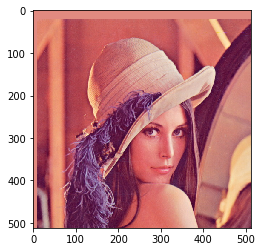

In [88]:
# 행렬 이동 - X축으로 10, Y축으로 20 이동
dx=10


height, width = img.shape[:2]
M = np.float32([
    [1,0,10],
    [0,1,20]])
c = img[0,0]
print(c)
dst = cv2.warpAffine(img, M, (width, height),
        borderValue=(   int(c[0]),int(c[1]),int(c[2])   ))
imshow("", dst)

In [ ]:
# 행렬 이동 - randomly shift
dx=10
height, width = img.shape[:2]

np.random.seed(0)
random_dx = np.random.rand(dx*2).reshape(dx,2)

M = []
for i in (1:dx) :
    M[i] = np.float32([
            [1,0,random_dx[i,0]],
            [0,1,random_dx[i,1]]
            ])


M = np.float32([
    [1,0,10],
    [0,1,20]])
c = img[0,0]
print(c)
dst = cv2.warpAffine(img, M, (width, height), borderValue=(255,0,0))
imshow("", dst)

In [91]:
np.random.rand(10).dtype

dtype('float64')

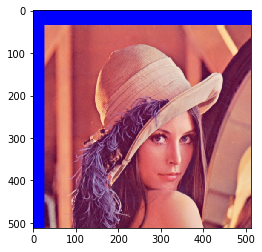

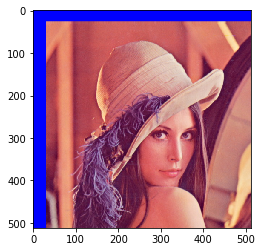

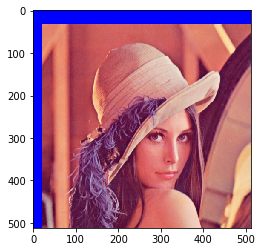

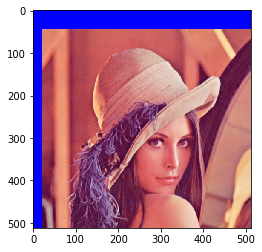

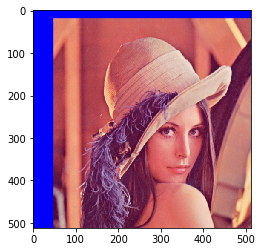

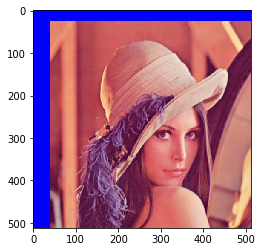

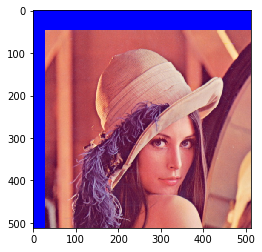

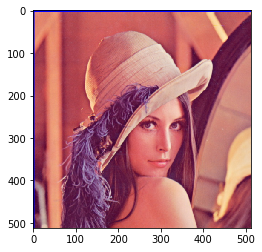

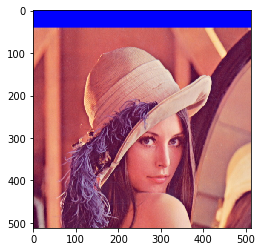

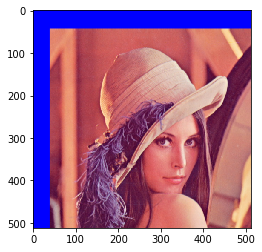

In [123]:
img = cv2.imread('../img/lena.jpg')
height, width = img.shape[:2]

dx=50
n=10 #그림갯수

np.random.seed(0)
dx_array = np.random.rand(n,2) * dx

for i in range(array_n) :
    M= np.float32([
            [1,0,dx_array[i,0]],
            [0,1,dx_array[i,1]]
            ])
    dst = cv2.warpAffine(img, M, (width, height), borderValue=(255,0,0))
    imshow("",dst)
    

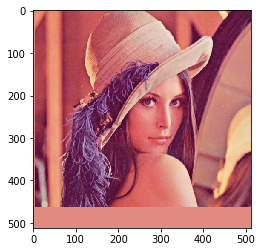

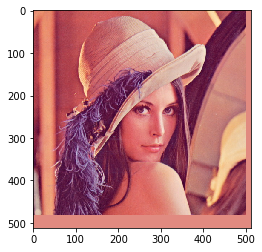

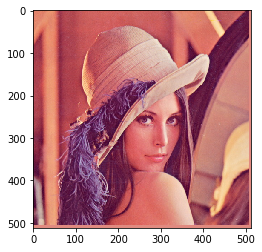

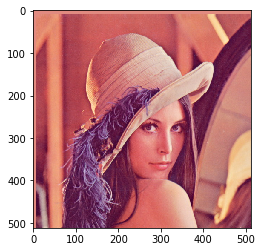

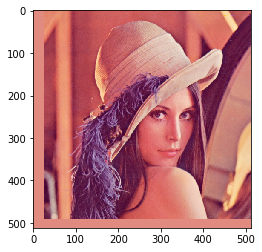

In [118]:
# pf
img = cv2.imread('../img/lena.jpg')
height, width = img.shape[:2]

# 원하는 랜덤 범위 생성. -50~50
dx = 50
r = np.random.randint(dx*2, size=(5,2))-dx
M = np.float32([
    [1,0,0],
    [0,1,0]])     # 왼 2x2 기본행렬은 회전 의미.

c = img[0,0]

for p in r.tolist() :   #p에는 r 이 들어오는 것임. 파이썬에서는 list 가능. C에서는 index 쓰겠지만
    M[:,2] = p  #모든 row, 2번 column
    dst = cv2.warpAffine(img, M, (width, height), 
            borderValue=(   int(c[0]),int(c[1]),int(c[2])   ))
    imshow("",dst)

In [124]:
r

array([[  4, -50],
       [-12, -31],
       [ -4,  -8],
       [  6,  10],
       [ 27, -20]])

In [125]:
r.tolist()

[[4, -50], [-12, -31], [-4, -8], [6, 10], [27, -20]]

## Rotation

[[  0.60621778  -0.35       190.40824764]
 [  0.35         0.60621778  11.20824764]]
(512, 512, 3)


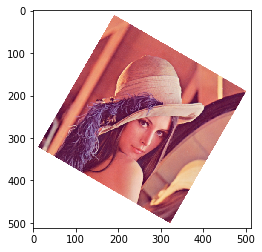

In [132]:
height, width = img.shape[:2]
img_center = (width / 2, height / 2)  #무게중심
M = cv2.getRotationMatrix2D(img_center, -30, 0.7)  #중심점, 회전각도, 회전시 scale size
print(M)
rotated_image = cv2.warpAffine(img, M, (width, height), borderValue=(255,255,255))

print(rotated_image.shape)

imshow("", rotated_image)